In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import Dataset

In [24]:
df=pd.read_csv("uber.csv")

In [25]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Shape

In [26]:
df.shape

(200000, 9)

# Remove Unneccesary columns

In [27]:
df=df.drop(['Unnamed: 0','pickup_datetime'],axis=1)
df

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [28]:
df.shape

(200000, 7)

# Remove Null Values

In [29]:
df.isna().sum()

key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [30]:
df=df.dropna()

In [31]:
df.shape

(199999, 7)

# Convert DateTime Column to Float 

In [32]:
df["key"]=pd.to_datetime(df["key"]).dt.strftime('%H').astype('float32')

C:\Users\Suramya\AppData\Local\Temp\ipykernel_25428\3120229921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["key"]=pd.to_datetime(df["key"]).dt.strftime('%H').astype('float32')


In [33]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,19.0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,20.0,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,21.0,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,8.0,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,17.0,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [34]:
df.dtypes

key                  float32
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

# Stats of each column

In [35]:
df.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,13.491387,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,6.515505,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,0.000000,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,9.000000,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,14.000000,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,19.000000,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,23.000000,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [36]:
print("AVG FARE: ", df["fare_amount"].mean())
print('MEDIAN FARE', df["fare_amount"].median())

AVG FARE:  11.359891549457748
MEDIAN FARE 8.5


In [46]:
df["passenger_count"].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

# Bar Graph of Value_Counts of Passengers

<AxesSubplot: >

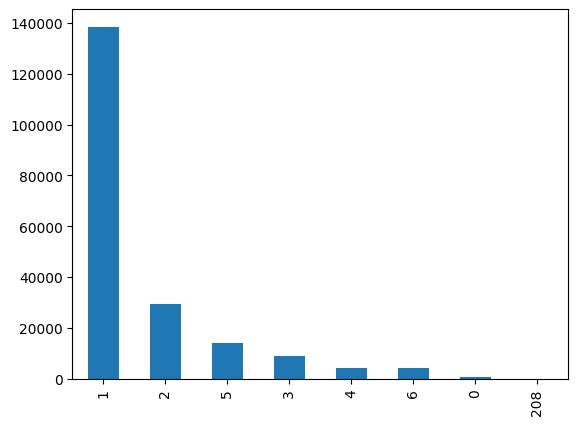

In [42]:
df["passenger_count"].value_counts().plot(kind='bar')


# Bar Graph of Passenger_Count VS Avg Fare

Text(0.5, 1.0, 'Avg Fare by Passenger Count')

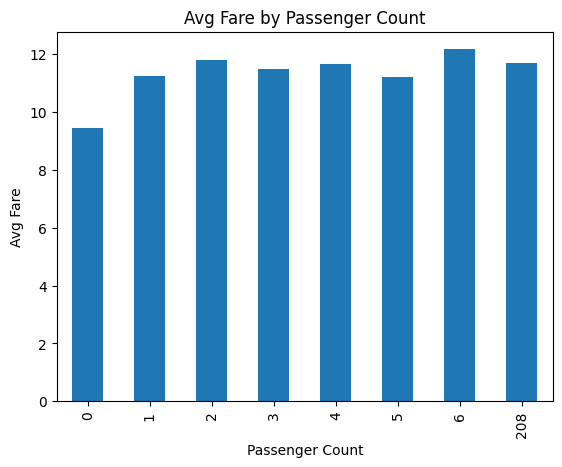

In [45]:
df.groupby('passenger_count')['fare_amount'].mean().plot(kind='bar')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Fare')
plt.title('Avg Fare by Passenger Count')

# Line Graph of Time and Avg Fair

Text(0.5, 1.0, 'Avg Fare by Hour of the Day')

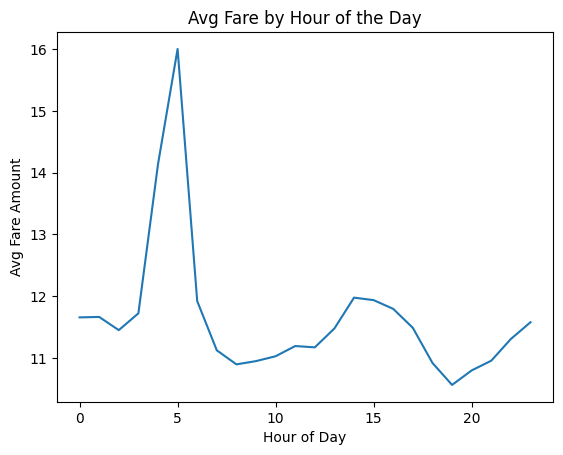

In [48]:
df.groupby('key')["fare_amount"].mean().plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare Amount')
plt.title('Avg Fare by Hour of the Day')

# Pie Plot of Passenger_Count

Text(0.5, 1.0, 'Percentage of Trips by Passengers')

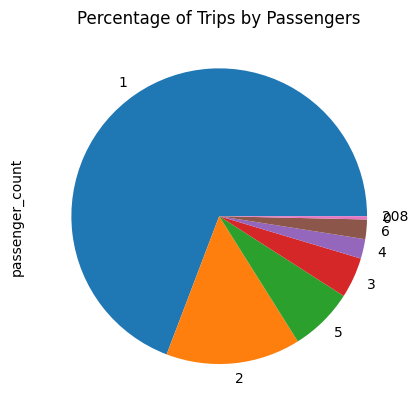

In [49]:
df["passenger_count"].value_counts().plot(kind='pie')
plt.title("Percentage of Trips by Passengers")

# Scatter Plot of Latitudes

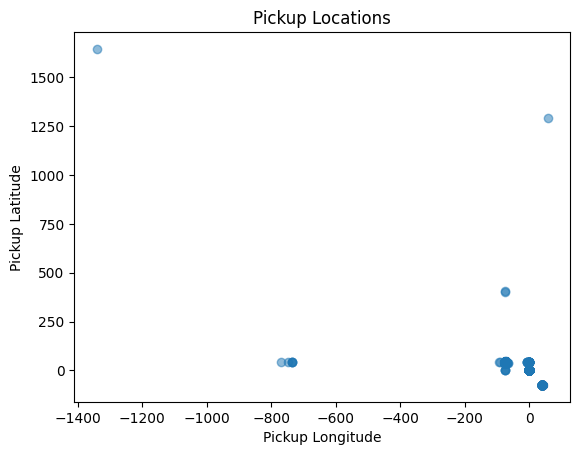

In [52]:
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.5)
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Pickup Locations")
plt.show()


# Box Plot of Fare

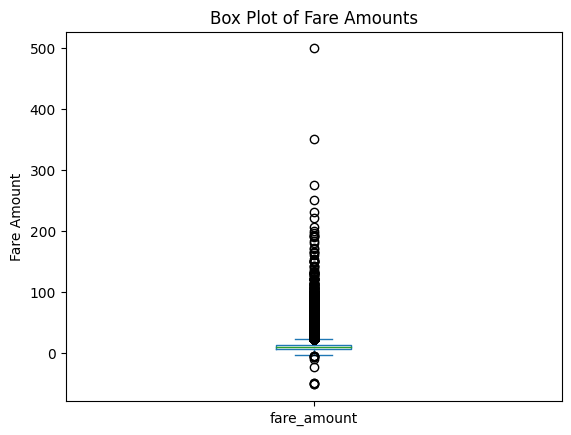

In [53]:
df['fare_amount'].plot(kind='box')
plt.ylabel("Fare Amount")
plt.title("Box Plot of Fare Amounts")
plt.show()


# Remove Outliers

In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]


In [55]:
print("Original dataset size:", len(df))
print("Dataset size after removing outliers:", len(df_no_outliers))


Original dataset size: 199999
Dataset size after removing outliers: 182833


In [56]:
df

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,19.0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,20.0,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,21.0,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,8.0,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,17.0,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,10.0,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,1.0,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,0.0,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.0,14.5,-73.997124,40.725452,-73.983215,40.695415,1


# Correlation Matrix

<AxesSubplot: >

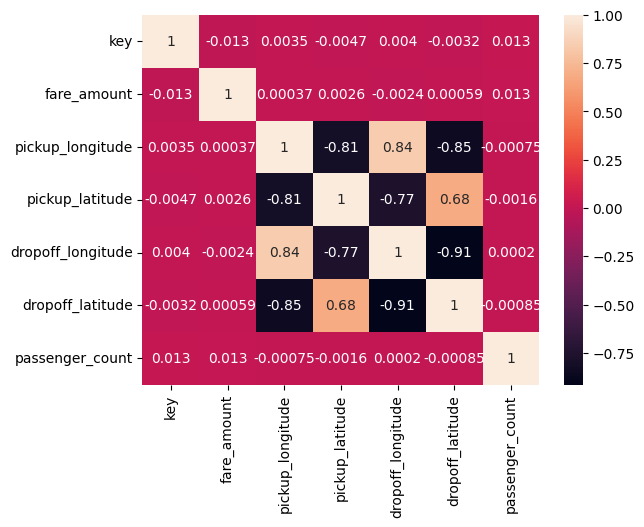

In [58]:
corr = df_no_outliers.corr()
sns.heatmap(corr, annot=True)

In [59]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df_no_outliers.drop(['fare_amount'], axis=1)
y = df_no_outliers['fare_amount']
X_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  4.16260310571115
R2 ->  0.00047252754788018603


In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  2.2177979817061266
R2 ->  0.7162677543437953
